##### Answer the question: what regularization techniques were mentioned in that Jupyter notebook? { Jupyter notebook for Chapter 5 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb }

Answer: _L1 Weight Regularization, L2 Weight Regularization, L1_L2 Weight Regularization and Dropout_

##### Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.utils import to_categorical, plot_model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

##### Load MNIST Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

##### Generate Dataset Arrays w.r.t Labels and club them according to the question

In [5]:
train_dict = {
    'club0': (x_train[y_train == 0], x_train[y_train == 1]),
    'club1': (x_train[y_train == 2], x_train[y_train == 3]),
    'club2': (x_train[y_train == 4], x_train[y_train == 5]),
    'club3': (x_train[y_train == 6], x_train[y_train == 7]),
    'club4': (x_train[y_train == 8], x_train[y_train == 9]),
}
test_dict = {
    'club0': (x_test[y_test == 0], x_test[y_test == 1]),
    'club1': (x_test[y_test == 2], x_test[y_test == 3]),
    'club2': (x_test[y_test == 4], x_test[y_test == 5]),
    'club3': (x_test[y_test == 6], x_test[y_test == 7]),
    'club4': (x_test[y_test == 8], x_test[y_test == 9]),
}
keymap = {
    0: 'club0',
    1: 'club1',
    2: 'club2',
    3: 'club3',
    4: 'club4',
}

##### Custom *Dataset* Builder

In [6]:
'''
HELPER FUNCTIONS
'''
# Average Arrays
def averageArray(array1, array2):

  shape_array1 = array1.shape
  shape_array2 = array2.shape

  decided_shape = np.minimum(shape_array1[0], shape_array2[0]) # shape check


  reshapedArray1 = array1[:decided_shape] # reshape arrays
  reshapedArray2 = array2[:decided_shape] # reshape arrays

  averagedArray = (reshapedArray1 + reshapedArray2) / 2

  return averagedArray, decided_shape


# Array Decider
def grabArrays(dict_of_arrays: dict, idx):

  return dict_of_arrays[idx][0], dict_of_arrays[idx][1]


# Dataset Creator
def datasetCreator(dict_of_arrays: dict, keymap: dict):

  varnameReq = 'dataset_dictValues'
  dataset = {}
  labels = [0, 1, 2, 3, 4]
  shapes = []
  keymap_keys = list(keymap.keys())

  for i in keymap_keys:

    temp1, temp2 = grabArrays(dict_of_arrays, keymap[i])
    print(f'Grabbed {keymap[i]} ----- Mixing Values for {keymap[i]}')
    print('----------------------------------')

    avged_array, shapevalue = averageArray(temp1, temp2)
    print(f'Got averaged array for {keymap[i]}')
    print('----------------------------------')

    shapes.append(shapevalue)
    dataset.update({f'club {i} avg': avged_array})

  mappedLabels_withCount = dict(zip(labels, shapes))

  print("Done")

  return dataset, mappedLabels_withCount


# Label Generator
def labelGenerator (shapesval_dataset: dict):

  yvals = []

  for index, (key, value) in enumerate(shapesval_dataset.items()):

    count = (value, )
    vals = np.full(count, key)

    yvals.append(vals)

  labelsarray = np.hstack((yvals[0], yvals[1], yvals[2], yvals[3], yvals[4]))

  return labelsarray

##### Custom Dataset _[Train and Test Data | Train and Test Labels]_

In [7]:
trainDatasetDictX, shapes_trainDataset = datasetCreator(train_dict, keymap)
testDatasetDictX, shapes_testDataset = datasetCreator(test_dict, keymap)
labels_trainDataset = np.array(labelGenerator(shapes_trainDataset))
labels_testDataset = np.array(labelGenerator(shapes_testDataset))

Grabbed club0 ----- Mixing Values for club0
----------------------------------
Got averaged array for club0
----------------------------------
Grabbed club1 ----- Mixing Values for club1
----------------------------------
Got averaged array for club1
----------------------------------
Grabbed club2 ----- Mixing Values for club2
----------------------------------
Got averaged array for club2
----------------------------------
Grabbed club3 ----- Mixing Values for club3
----------------------------------
Got averaged array for club3
----------------------------------
Grabbed club4 ----- Mixing Values for club4
----------------------------------
Got averaged array for club4
----------------------------------
Done
Grabbed club0 ----- Mixing Values for club0
----------------------------------
Got averaged array for club0
----------------------------------
Grabbed club1 ----- Mixing Values for club1
----------------------------------
Got averaged array for club1
-----------------------------

In [8]:
# Train
Xtrain_final = np.vstack((trainDatasetDictX['club 0 avg'], trainDatasetDictX['club 1 avg'],
                          trainDatasetDictX['club 2 avg'], trainDatasetDictX['club 3 avg'], trainDatasetDictX['club 4 avg']))

# Test
Xtest_final = np.vstack((testDatasetDictX['club 0 avg'], testDatasetDictX['club 1 avg'],
                          testDatasetDictX['club 2 avg'], testDatasetDictX['club 3 avg'], testDatasetDictX['club 4 avg']))

Combination of 0 and 1


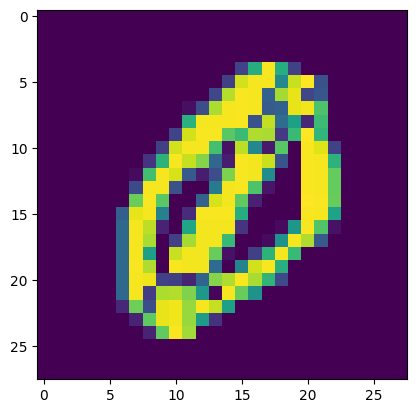

In [30]:
print('Combination of 0 and 1')
plt.imshow(trainDatasetDictX['club 0 avg'][0])

Combination of 2 and 3


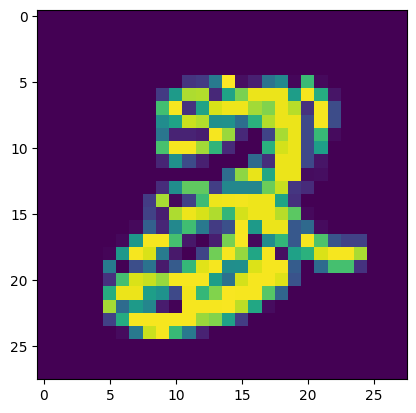

In [10]:
print('Combination of 2 and 3')
plt.imshow(trainDatasetDictX['club 1 avg'][0])

Combination of 4 and 5


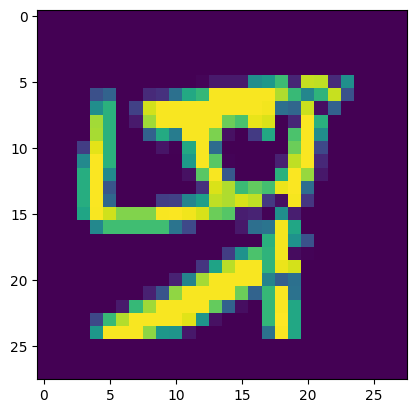

In [11]:
print('Combination of 4 and 5')
plt.imshow(trainDatasetDictX['club 2 avg'][0])

Combination of 6 and 7


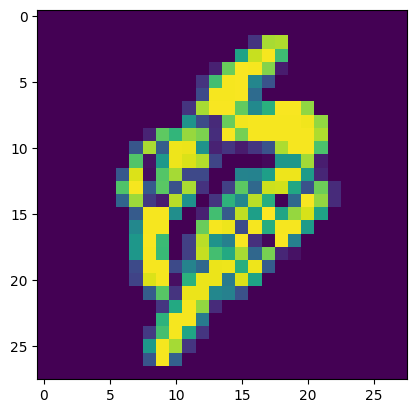

In [12]:
print('Combination of 6 and 7')
plt.imshow(trainDatasetDictX['club 3 avg'][0])

Combination of 8 and 9


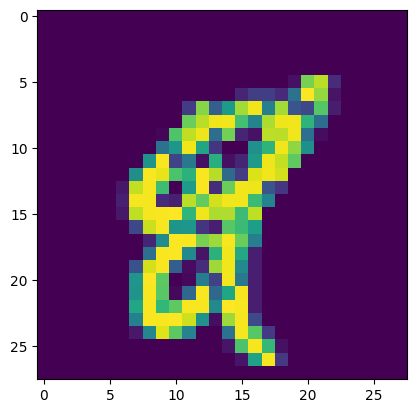

In [13]:
print('Combination of 8 and 9')
plt.imshow(trainDatasetDictX['club 4 avg'][0])

In [14]:
# verify counts
print(f' LENGTHS \n ------------- \n Xtrain_Final length: {len(Xtrain_final)} \n Xtest_final length: {len(Xtest_final)}')
print(f' \n labels_trainDataset length: {len(labels_trainDataset)} \n labels_testDataset length: {len(labels_testDataset)}')

 LENGTHS 
 ------------- 
 Xtrain_Final length: 29071 
 Xtest_final length: 4814
 
 labels_trainDataset length: 29071 
 labels_testDataset length: 4814


##### MODEL BUILD | TRAIN | VALIDATE | TEST

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(5, activation="sigmoid")
])

In [16]:
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.0005,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="AdamW",
)

In [17]:
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
# training set | validation set >> Random Selection
from sklearn.model_selection import train_test_split

X, y = Xtrain_final, labels_trainDataset
validation_split = 0.2
X_train_model, X_val_model, y_train_model, y_val_model = train_test_split(X, y, test_size=validation_split, random_state=42)

In [19]:
# reshape images to 1D arrays

image_size = X_train_model.shape[1]
input_size = image_size * image_size
print(input_size)

X_train_model = np.reshape(X_train_model, [-1, input_size])
X_train_model = X_train_model.astype('float32') / 255

X_val_model = np.reshape(X_val_model, [-1, input_size])
X_val_model = X_val_model.astype('float32') / 255

X_test_model = np.reshape(Xtest_final, [-1, input_size])
X_test_model = X_test_model.astype('float32') / 255

784


In [20]:
X_train_model.shape

(23256, 784)

In [21]:
y_train_model = tf.one_hot(y_train_model, depth=5)
y_val_model = tf.one_hot(y_val_model, depth=5)
y_test_model = tf.one_hot(labels_testDataset, depth=5)

In [22]:
y_train_model.shape

TensorShape([23256, 5])

In [23]:
history = model.fit(X_train_model,
                    y_train_model,
                    epochs=17,
                    batch_size=256,
                    validation_data=(X_val_model, y_val_model))

Epoch 1/17
91/91 [==============================] - 3s 22ms/step - loss: 0.8860 - accuracy: 0.7693 - val_loss: 0.4455 - val_accuracy: 0.9145
Epoch 2/17
91/91 [==============================] - 2s 19ms/step - loss: 0.4442 - accuracy: 0.9100 - val_loss: 0.3719 - val_accuracy: 0.9319
Epoch 3/17
91/91 [==============================] - 1s 16ms/step - loss: 0.3713 - accuracy: 0.9264 - val_loss: 0.3392 - val_accuracy: 0.9360
Epoch 4/17
91/91 [==============================] - 1s 16ms/step - loss: 0.3272 - accuracy: 0.9378 - val_loss: 0.3055 - val_accuracy: 0.9426
Epoch 5/17
91/91 [==============================] - 2s 24ms/step - loss: 0.2959 - accuracy: 0.9449 - val_loss: 0.2833 - val_accuracy: 0.9460
Epoch 6/17
91/91 [==============================] - 2s 19ms/step - loss: 0.2740 - accuracy: 0.9487 - val_loss: 0.2642 - val_accuracy: 0.9498
Epoch 7/17
91/91 [==============================] - 1s 16ms/step - loss: 0.2483 - accuracy: 0.9549 - val_loss: 0.2482 - val_accuracy: 0.9534
Epoch 8/17
91

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 534533 (2.04 MB)
Trainable params: 534533 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


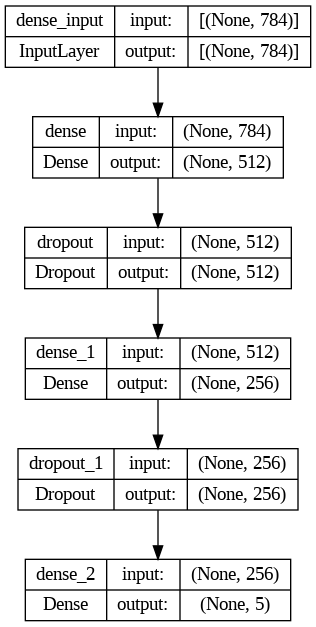

In [25]:
plot_model(model, to_file='mnist-customData.png', show_shapes=True)

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

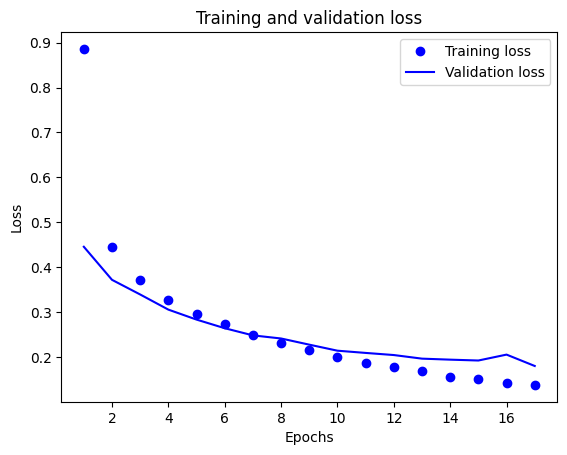

In [27]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

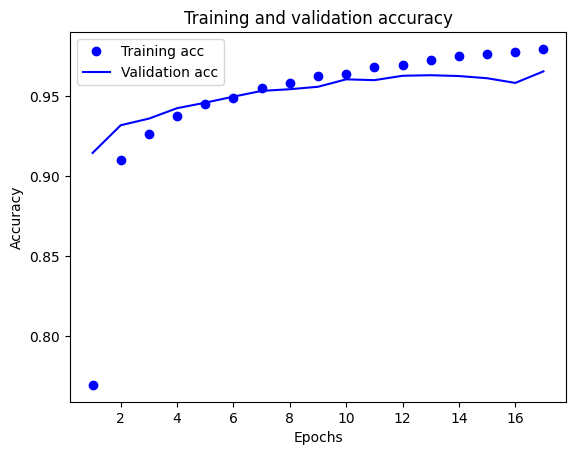

In [28]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(X_test_model, y_test_model)
print(f"test accuracy: {test_acc} \ntest loss: {test_loss}")

151/151 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.9651
test accuracy: 0.9651017785072327 
test loss: 0.17441873252391815


QUESTION: For your final (namely, optimized) neural network model, submit its code, and show the model's performance (including loss value and accuracy) for training, validation and testing. (For training performance and validation performance, illustrate them using figures, where the x-axis is the number of training epochs, and the y-axis is the loss or accuracy. For testing performance, just show the values of loss and accuracy.) Also, answer the questions: in this process of optimizing your model, did you observe underfitting? Did you observe overfitting? Did you try the reguliazation techniques? Did they help?

*ANSWER: Indeed I observed both underfitting and overfitting {Overfitting when I didn't use any droput layer or regularization techniques | Underfitting when I put regularizers (L2) for all of my layers}*

*Interestingly for one iteration of this experiment I got the best results of 98.XY% train accuracy and ~98% (97.XY) test accuracy and I didn't use the anything except for dropout layers. But I was unable to replicate that performance again (I wonder if this is because of the sklearn random train-test split.)*

*Although the code I presented here is the one consistently gives 96.5 - 97% test accuracy. So I think this is a good optimal choice. To summarize L2 regularization helped a little bit but for my experiment I can say dropout was important {else overfit}*

**[ I would appreciate if you had any suggestions to increase the accuracy or what you think an optimal architecture for reproducable nn ]**